# APA Laboratori 1 (TEMA 1)  - Ridge and standard regression  

 Començarem fent bàsicament l'exemple introductori del TEMA 1 (ajust polinòmic)

In [1]:
set.seed (7) # per igualar els resultats de tothom (esperem!)

 Variables de control

In [2]:
N <- 20
a <- 0
b <- 1
sigma.quadrat <- 0.3^2

Noteu que si poseu una expressió entre parèntesis, R l'avalúa i mostra el resultat (per això poso tants parèntesis). Proveu:

In [3]:
pep <- 3

(pep <- 3)

[1] 3

 Generació de la mostra TR (de training) de mida N, inputs x_n uniformes en (0,1)

El sort() és per claredat, no té cap importància

Noteu que a classe era N=10 per pura simplicitat del dibuix a la pissarra!

In [4]:
x <- sort(runif(N, a,b))
t <- sin(2*pi*x) + rnorm(N, mean=0, sd=sqrt(sigma.quadrat))
(sample <- data.frame(input=x,target=t))

input,target
0.00870460,0.161761221
0.06974868,1.239375485
0.08470071,1.191857490
0.09630154,0.666034392
0.11569778,1.233414311
0.16585548,1.003769916
0.17174808,0.613404837
0.23147710,0.901036673
0.24374939,0.997782159
0.31658480,1.210203790


In [5]:
dim(sample)
attach(sample)

[1] 20  2

Dibuixem les dades i la funció "target" (la part regular, que voldríem detectar)

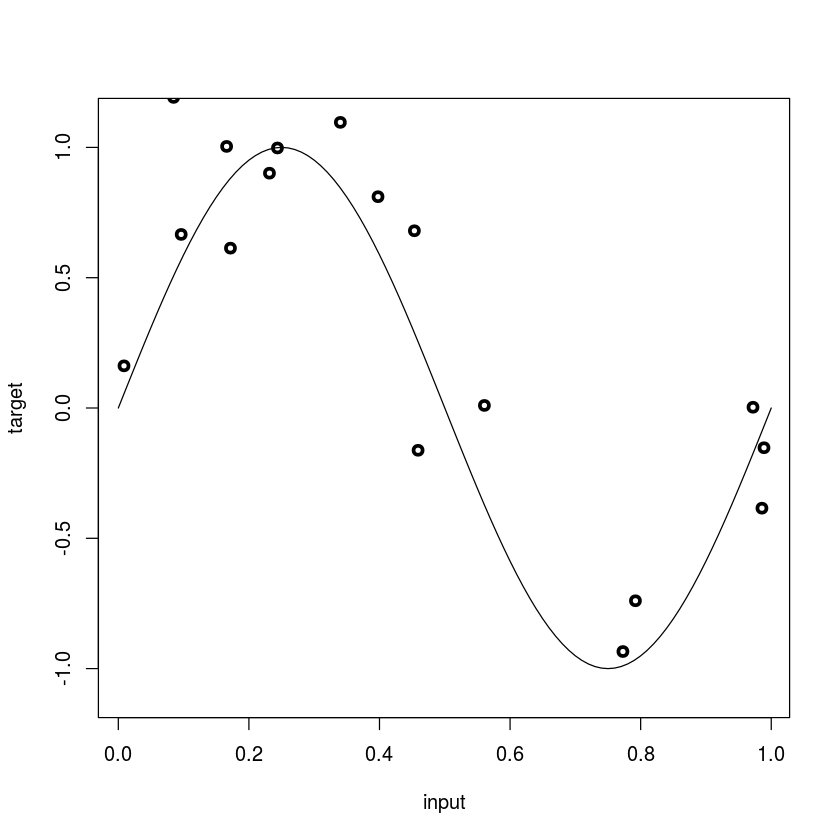

In [6]:
plot(input,target, lwd=3, ylim = c(-1.1, 1.1))
curve (sin(2*pi*x), a, b, add=TRUE, ylim = c(-1.1, 1.1))

Generació de la mostra de validacio (VA) de mida N.valid, inputs x equiespaiats en (a,b)
 la usarem per fer prediccions

In [7]:
N.valid <- 1000

x.valid <- sort(runif(N.valid, a,b))
t.valid <- sin(2*pi*x.valid) + rnorm(N.valid, mean=0, sd=sqrt(sigma.quadrat))
valid.sample <- data.frame(input=x.valid,target=t.valid)

 <div class="alert alert-block alert-info">
 
 Regressió lineal amb grau M=1, per començar, model lineal
 </div>

In [8]:
model <- glm (target ~ input, data = sample, family = gaussian)

model # ens diu que el model és y(x) = -1.606·x + 1.133


Call:  glm(formula = target ~ input, family = gaussian, data = sample)

Coefficients:
(Intercept)        input  
      1.133       -1.606  

Degrees of Freedom: 19 Total (i.e. Null);  18 Residual
Null Deviance:	    9.082 
Residual Deviance: 3.81 	AIC: 29.59

fem-lo predir les dades TR (les usades per trobar el model) i calculem l'error quadràtic mitjà

In [9]:
(prediccio <- predict(model, data=sample))

1          2          3          4          5          6          7 
 1.1188967  1.0208622  0.9968498  0.9782193  0.9470697  0.8665183  0.8570551 
         8          9         10         11         12         13         14 
 0.7611325  0.7414237  0.6244528  0.5867487  0.4941118  0.4046560  0.3955729 
        15         16         17         18         19         20 
 0.2324678 -0.1082307 -0.1390627 -0.4282195 -0.4501804 -0.4552749

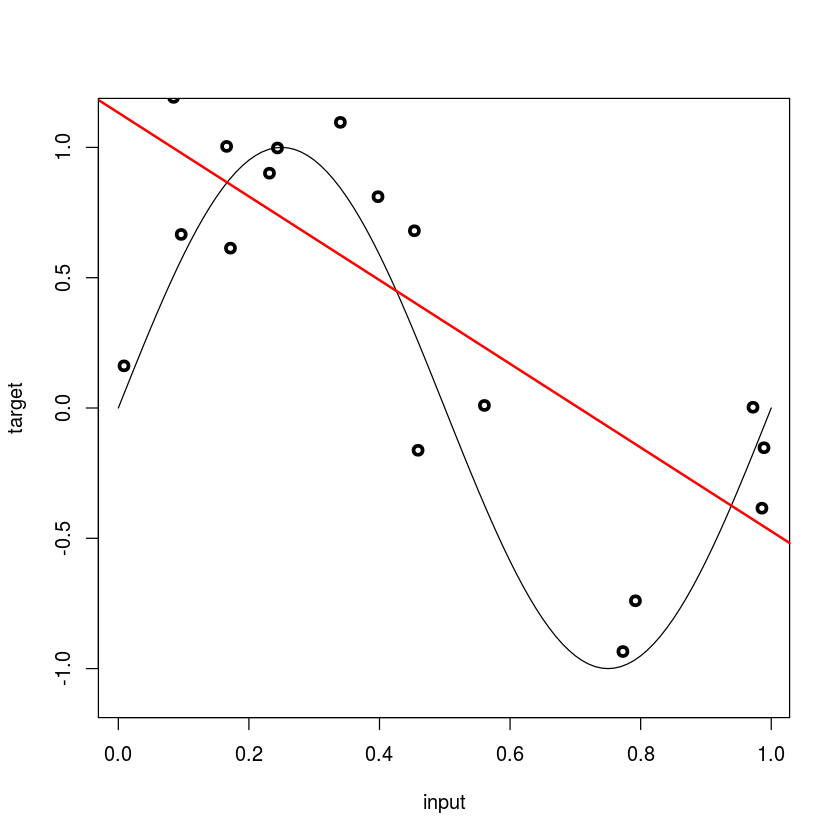

In [10]:
plot(input,target, lwd=3, ylim = c(-1.1, 1.1))
curve (sin(2*pi*x), a, b, add=TRUE, ylim = c(-1.1, 1.1))
abline(model,col="red", lwd=2)

In [11]:
(mean.square.error <- sum((target - prediccio)^2)/N)

[1] 0.1904772

alternativament, glm() ens el calcula

In [12]:
(mean.square.error <- model$deviance/N)

[1] 0.1904772

 si mireu el help de glm() fent ?glm --que és una rutina molt potent i general, i serveix per molts tipus de regressions-- veureu que diu:

 "deviance": up to a constant, minus twice the maximized log-likelihood

 això ho hem vist a classe, en el cas de regressió lineal (el cas que ens ocupa), hem
 obtingut la suma dels error quadràtics (la deviance, en argot estadístic), per minimització del "minus log-likelihood".

si us surt, la frase "Where sensible, the constant is chosen so that a saturated model has deviance zero" vol dir simplement que un model interpolador (que prediu exactament els targets) tindrà deviance zero.

 com a curiositat, 'null.deviance' és l'error d'un model "null" (que només te el terme
 independent), i correspón al model M=0; l'AIC el veurem més endavant (o no)

In [13]:
?glm

In [14]:
model$null.deviance/N

[1] 0.4541074

 Dit tot això, reprenem el fil i tornem a l'error quadràtic mitjà. Resulta que és convenient treballar amb la seva arrel, per obtenir així la "llargada" del vector d'errors

In [15]:
(root.mse <- sqrt(model$deviance/N))

[1] 0.4364369

però és encara millor normalitzar l'error, dividint per la variança dels targets, obtenint el que s'anomena NMSE (normalized mean squared error)

In [16]:
(NMSE <- model$deviance/((N-1)*var(target)))

[1] 0.419454

 Interpretació:
 
1. Òbviament NMSE >= 0, però no té cota superior definida
2. un model constant que predigui la mitjana dels targets (de fet, el millor model constant), tindria un NMSE = 1.
3. models amb NMSE > 1 són per tant horribles; un model es comença a considerar acceptable a partir de NMSE < 0.2
4. observeu que, notant que l'error quadràtic no és més que l'estimació de la variança dels targets, el NMSE es pot veure com la fracció de la variança dels targets no explicada (capturada) per les prediccions del model. Per exemple, un NMSE = 0.13 correspon a un model capaç d'explicar el 87% de la variabilitat del target.

 El nostre model M=1 explica per tant només el 58% de la variabilitat del target.

<div class="alert alert-block alert-info">
 Regressió cúbica (polinomi de grau M=3, continua sent un model lineal, penseu-lo)
</div>

In [17]:
model <- glm (target ~ poly(input, 3, raw=TRUE), data = sample, family = gaussian)

 veiem-ne el model: summary() dóna més informació

In [18]:
summary(model)


Call:
glm(formula = target ~ poly(input, 3, raw = TRUE), family = gaussian, 
    data = sample)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.54238  -0.21388   0.02159   0.24464   0.43526  

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   0.3265     0.2234   1.461 0.163247    
poly(input, 3, raw = TRUE)1   8.6171     2.1342   4.038 0.000954 ***
poly(input, 3, raw = TRUE)2 -26.5899     5.2419  -5.073 0.000113 ***
poly(input, 3, raw = TRUE)3  17.5885     3.4666   5.074 0.000113 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.09093278)

    Null deviance: 9.0821  on 19  degrees of freedom
Residual deviance: 1.4549  on 16  degrees of freedom
AIC: 14.342

Number of Fisher Scoring iterations: 2


 Deviance Residuals són les diferències al quadrat punt a punt. El que se'ns mostra són els estadístics (min, median, etc) de les 20 que tenim.
 els coeficients del polinomi (del model) són:

In [19]:
model$coefficients

(Intercept) poly(input, 3, raw = TRUE)1 
                  0.3264768                   8.6171010 
poly(input, 3, raw = TRUE)2 poly(input, 3, raw = TRUE)3 
                -26.5898537                  17.5885350

 o sigui el polinomi és y(x) = 17.5885350·x^3 -26.5898537·x^2 -8.6171010·x + 0.3264768

 Std. Error és la incertesa de cada coeficient, relativa al valor del coeficient; en aquest cas són molt altes, cosa que és deguda a que només tenim 20 punts 

 La darrera columna és un test sobre la probabilitat de que cada coeficient sigui en realitat zero (i per tant, l'entrada x corresponent no té relació amb el target). Per interpretar-ho, mireu el codi inferior:

 Signif. codes:  0 ‘\*\*\*’ 0.001 ‘\*\*’ 0.01 ‘\*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Entrades x amb '\*\*\*' són imprescindibles, després '\*\*', etc. Tot això, suposant, és clar, que el model és correcte (que no és el cas, com sabem, perquè l'hem dissenyat nosaltres)


 Ara ho dibuixem tot de nou

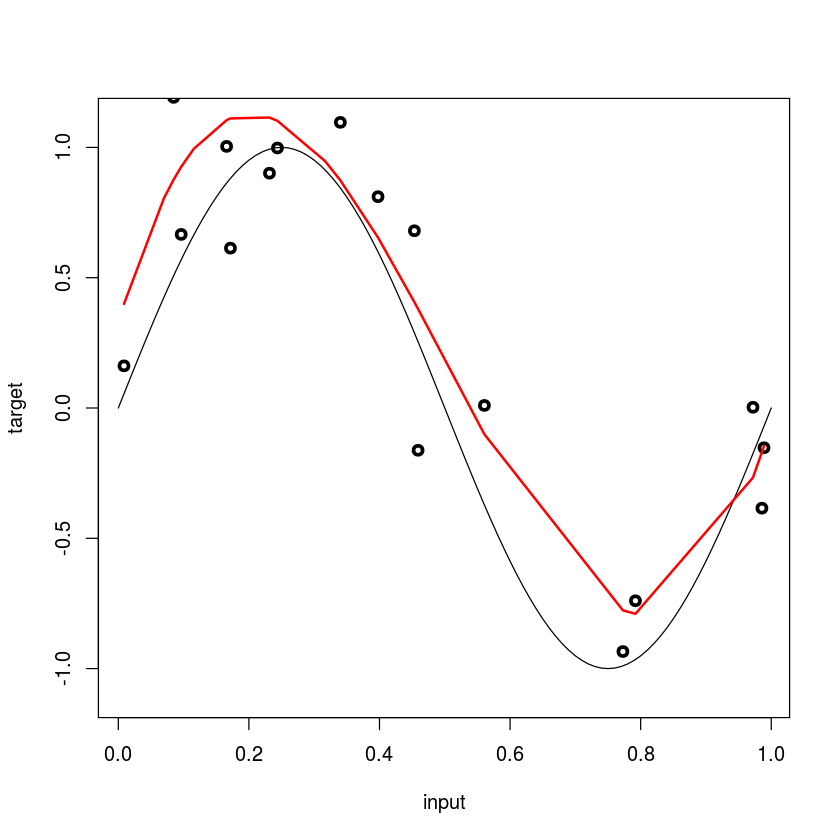

In [20]:
plot(input,target, lwd=3, ylim = c(-1.1, 1.1))                # dades de TR
curve (sin(2*pi*x), a, b, add=TRUE, ylim = c(-1.1, 1.1))      # part regular a modelar
points(input, predict(model), type="l", col="red", lwd=2)     # el model obtingut

 calculem l'error normalitzat NRMSE a la mostra de TR

In [21]:
(NMSE <- model$deviance/((N-1)*var(target)))

[1] 0.1601961

 gairebé 84%, ha millorat força ... per cert, aquesta quantitat és el famós coeficient R^2 d'ajust en regressió (expressat com a 0.84)


 Ara veurem com calcular l'error normalitzat a la mostra de validacio
 hem de fer-ho explícitament, ja que predict() només dóna les prediccions, no els errors

fem un cop d'ull primer a les dades de VA

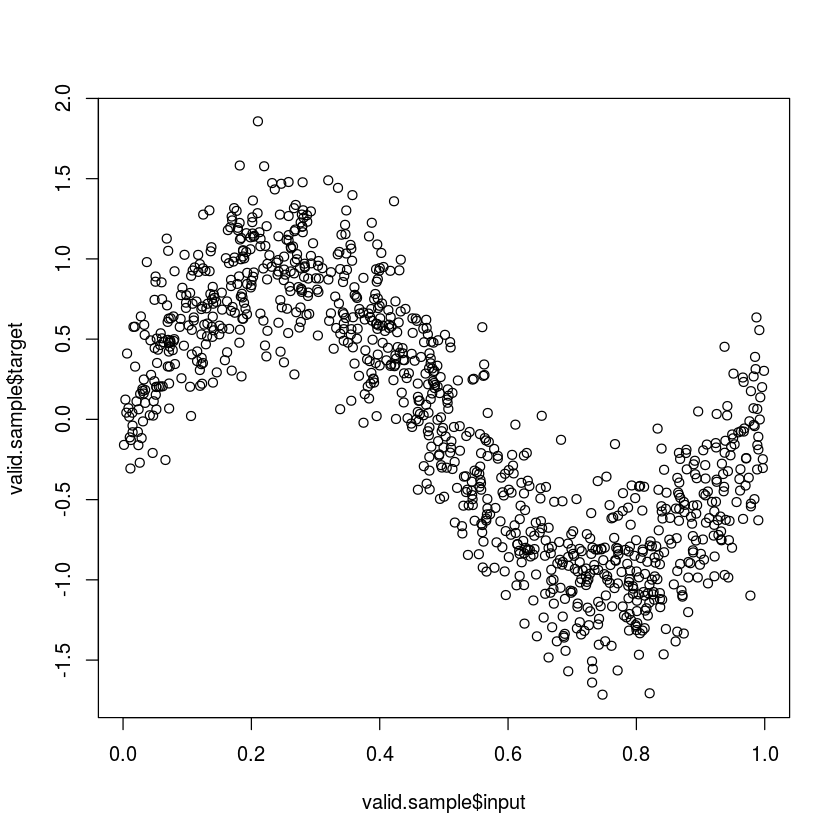

In [22]:
plot(valid.sample$input, valid.sample$target)

i calculem l'error

In [23]:
prediccions <- predict (model, newdata=valid.sample)
(NMSE.valid <- sum((valid.sample$target - prediccions)^2)/((N.valid-1)*var(valid.sample$target)))

[1] 0.2335588

Quan un model és incorrecte, el seu error de predicció és alt. En cas de models sobreajustats, sol ser molt superior al de TR. En cas de models infraajustats (com és el cas ara), tots dos són elevats i similars. Aquest és un model raonable i per tant tos dos errors són baixos i similars.

 <div class="alert alert-block alert-info">
 Ara farem la mateixa simulació que a classe, fent regressió polinòmica, de graus M des de p a q (poden ser arbitraris, els fixarem en 1 i N-1)
</div>
   desem coeficients del polinomi (del model) i els error de training i validacio

In [24]:
p <- 1
q <- N-1

coef <- list()
model <- list()
norm.mse.train <- NULL
norm.mse.valid <- NULL

for (i in p:q)
{
  model[[i]] <- glm(target ~ poly(input, i, raw=TRUE), data = sample, family = gaussian)

  coef[[i]] <- model[[i]]$coefficients
  norm.mse.train[i] <- model[[i]]$deviance/((N-1)*var(target))

  prediccions <- predict (model[[i]], newdata=valid.sample)  
  norm.mse.valid[i] <- sum((valid.sample$target - prediccions)^2)/((N.valid-1)*var(valid.sample$target))
}

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

 ho arrepleguem tot en una matriu

In [25]:
resultats <- cbind (Grau=p:q, Coeficients=coef, Error.train=norm.mse.train, Error.valid=norm.mse.valid)

dibuixem 6 dels models (graus 1,2,3,4,9,19) contra les dades de training

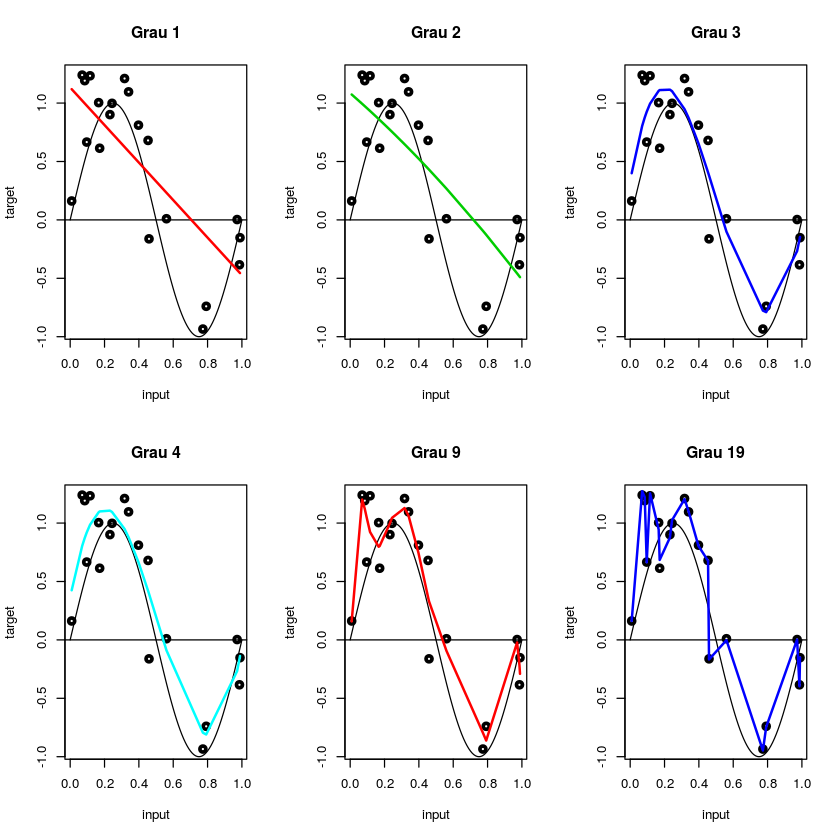

In [26]:
par(mfrow=c(2, 3))                # això crea una graella (grid) de 2x3

graus <- c(1,2,3,4,9,19)

for (i in graus)
{
  plot(input,target, lwd=3)
  curve (sin(2*pi*x), a, b, add=TRUE)
  abline(0,0)
  points(input, predict(model[[i]]), type="l", col=25+i, lwd=2)
  title (main=paste('Grau',i))
}

 Ara dibuixem les prediccions dels mateixos models contra les dades de validacio
 la funció a modelar està sempre en groc, per referència

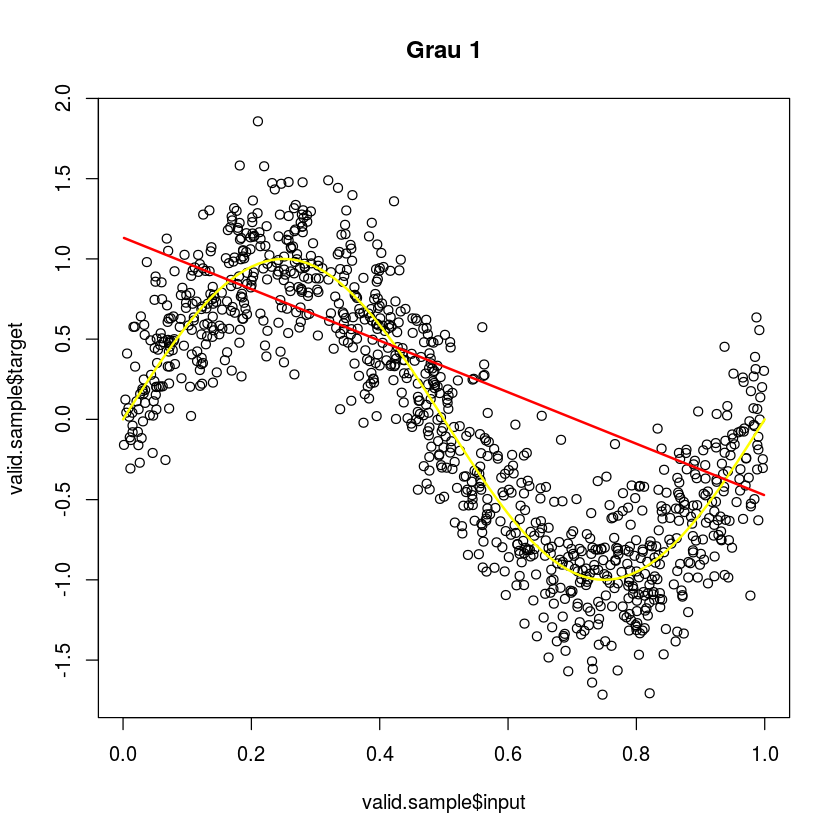

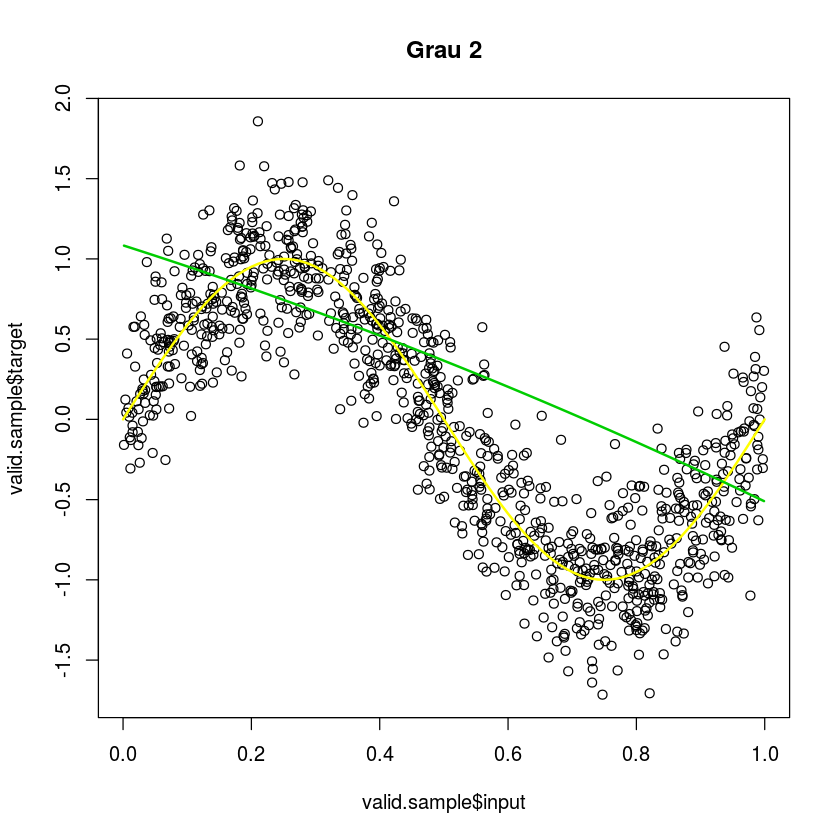

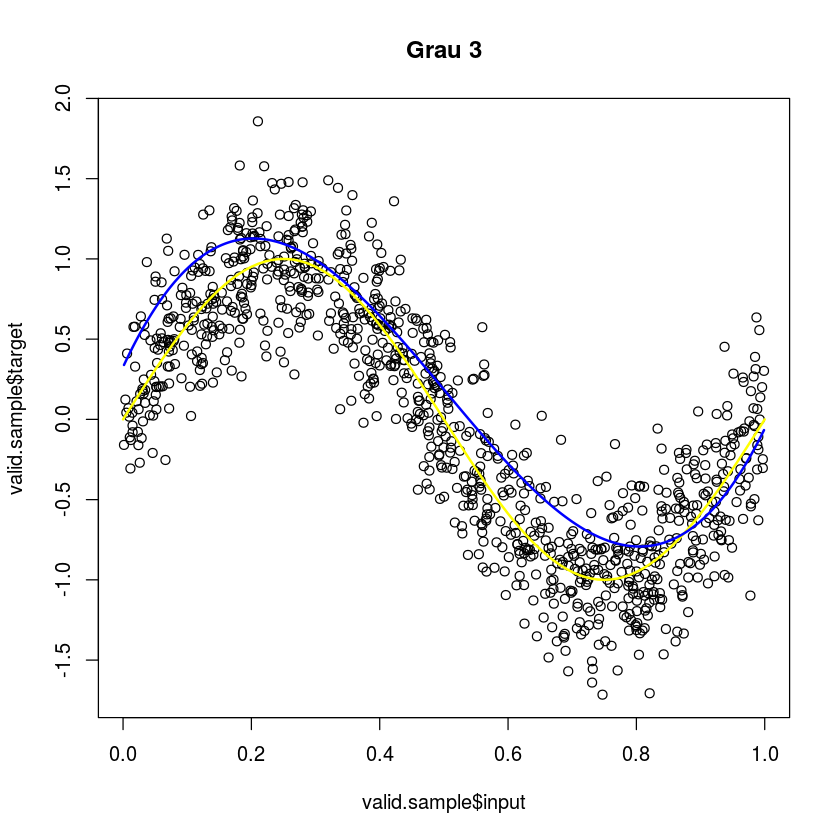

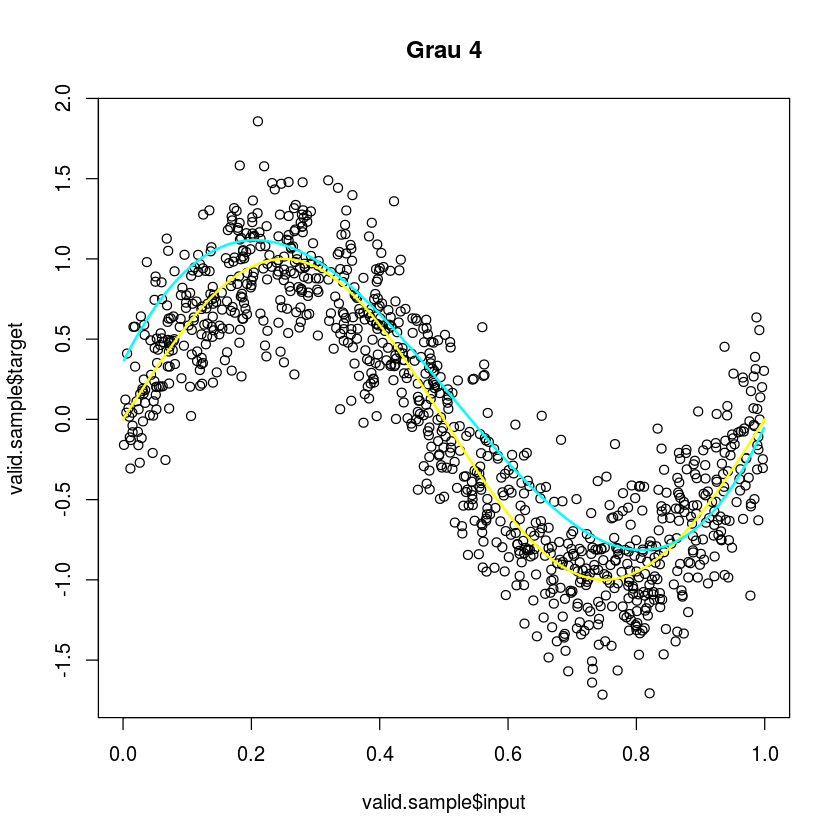

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

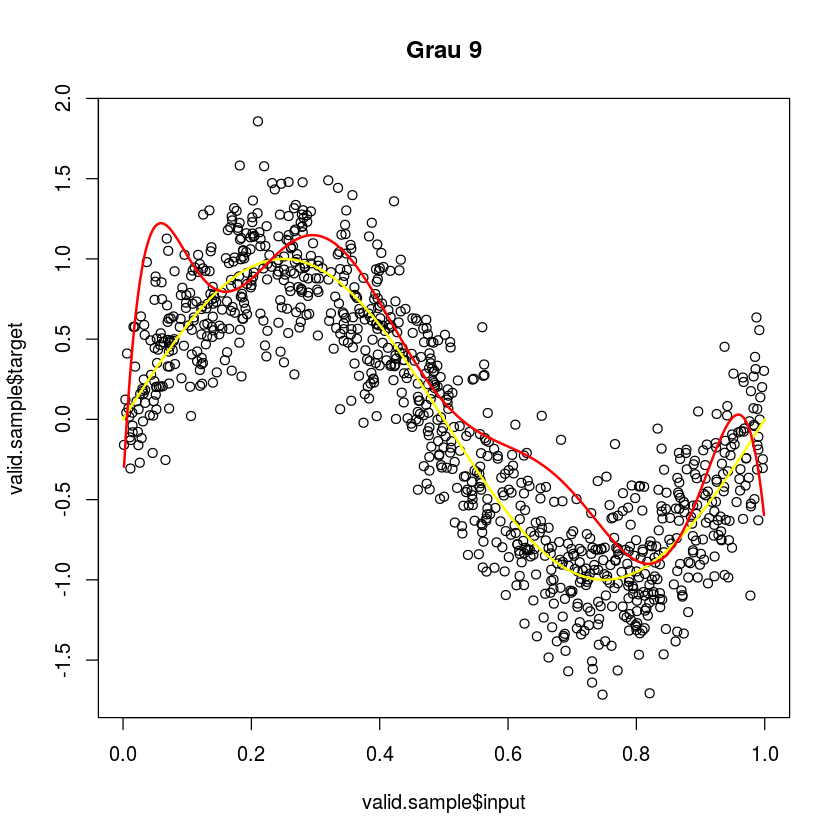

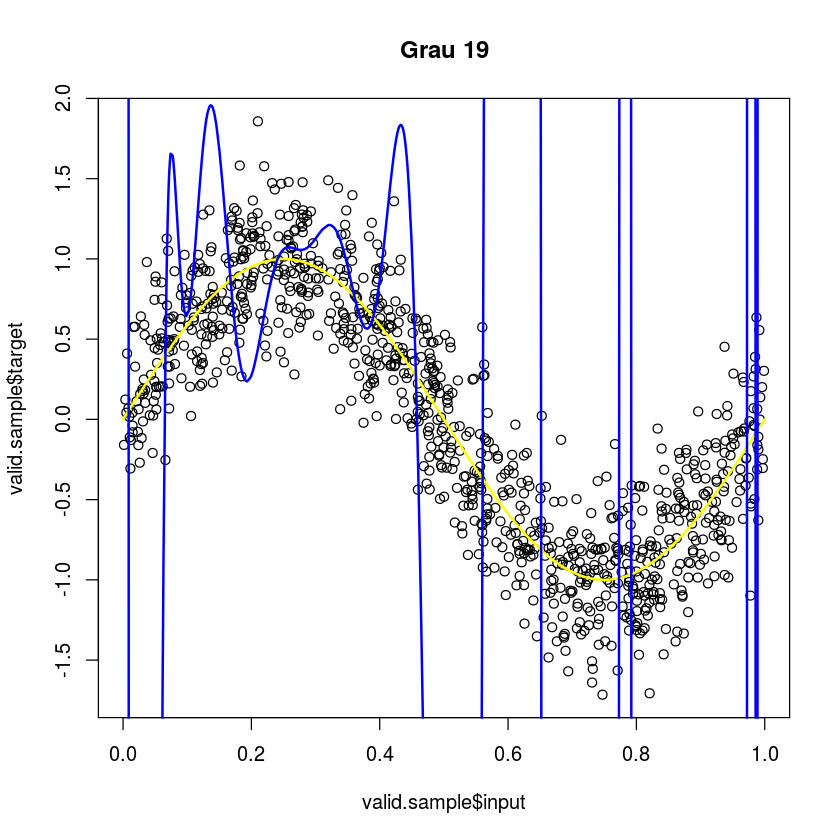

In [27]:
for (i in graus)
{
  plot(valid.sample$input, valid.sample$target)
  curve (sin(2*pi*x), a, b, add=TRUE, col='yellow',lwd=2)
  points(valid.sample$input, predict(model[[i]], newdata=valid.sample), type="l", col=25+i, lwd=2)
  title (main=paste('Grau',i))
}

 Ara farem una gràfica similar a la de classe: error de TR i error de VA junts, en funció del grau M; observarem els fenòmens de sobreajust i infraajust molt clarament

Ometem els graus a partir del 17 perquè els valors es disparen i caurien fora del dibuix; però podeu mirar els resultats numèrics a la matriu:

In [28]:
(r <- data.frame(resultats[,-2]))

par(mfrow=c(1,1))

Grau,Error.train,Error.valid
1,0.419454,0.668733
2,0.4179419,0.6825725
3,0.1601961,0.2335588
4,0.1599038,0.233627
5,0.1596058,0.2405754
6,0.1277075,0.3123137
7,0.1199549,0.2608449
8,0.0863783,0.3412057
9,0.08621885,0.3278474
10,0.07713956,0.7208899


 preparar un plot buit i omplir-lo

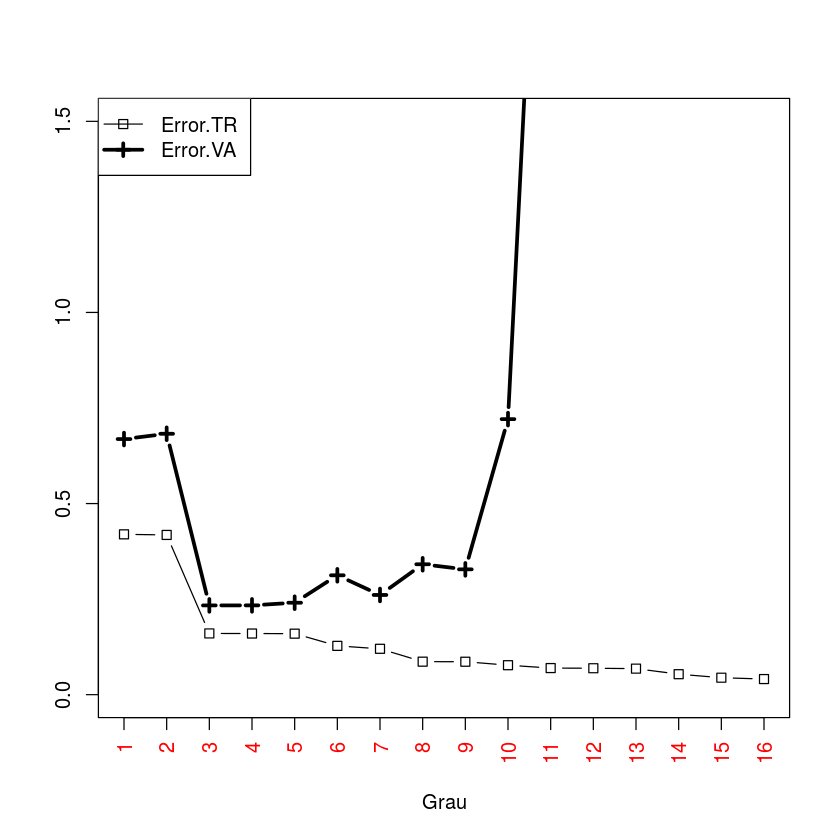

In [29]:
plot(1:20, 1:20, xlim=c(1,16), ylim=c(0,1.5), type = "n", xlab="Grau", ylab="", xaxt="n")  

axis(1, at=1:16,labels=1:16, col.axis="red", las=2)
points (x=r$Grau[1:16], y=r$Error.train[1:16], type='b', pch=0)
points (x=r$Grau[1:16], y=r$Error.valid[1:16], type='b', pch=3, lwd=3)

legend(x="topleft", legend=c("Error.TR", "Error.VA"), pch=c(0, 3), lwd=c(1, 3))

 Per un pèl, el menor error de VA és per M=3, per tant el métode vist a classe seleccionaria el model correcte (se'n diu "model selection"). Noteu que el "model selection" és bàsicament la detecció de la complexitat adequada al problema (la millor en aquest cas, --és a dir, dins els polinomis-- correspón a un de cúbic). Més endavant tractarem el tema de la "complexitat" d'un model des d'un de vista més general.


 Ara investigarem els propis coeficients: veurem que tot coeficient del mateix grau va fent-se gran (en valor absolut) a mesura que puja el grau màxim (tret del coeficient de grau 0 o Intercept, que més o menys es manté constant, donat que intenta seguir la mitjana dels targets, que no varia)

 Estudiem només fins al grau 10, per fer la taula manegable

In [30]:
coefs.table <- matrix (nrow=10, ncol=9)

for (i in 1:10)
  for (j in 1:9)
    coefs.table[i,j] <- coef[[j]][i]

coefs.table

1.132876,1.0844778,0.3264768,0.3568835,0.3268113,8.553415e-02,-2.946476e-02,-3.661027e-01,-4.018037e-01
-1.605962,-1.2794397,8.6171010,7.9996913,9.0296205,2.260371e+01,3.179382e+01,6.943115e+01,7.418122e+01
NA,-0.3165401,-26.5898537,-23.7058024,-31.9938065,-1.980077e+02,-3.424321e+02,-1.092472e+03,-1.206650e+03
NA,NA,17.5885350,13.0179027,37.4790430,8.149175e+02,1.704025e+03,7.678878e+03,8.821709e+03
NA,NA,NA,2.2875104,-27.1108740,-1.685570e+03,-4.332365e+03,-2.817915e+04,-3.414566e+04
NA,NA,NA,NA,12.2488011,1.632314e+03,5.698220e+03,5.773709e+04,7.558953e+04
NA,NA,NA,NA,NA,-5.869543e+02,-3.688041e+03,-6.661341e+04,-9.826214e+04
NA,NA,NA,NA,NA,NA,9.285284e+02,4.044870e+04,7.321290e+04
NA,NA,NA,NA,NA,NA,NA,-1.004938e+04,-2.830947e+04
NA,NA,NA,NA,NA,NA,NA,NA,4.225381e+03


 si cap a la finestra, movem-ne els marges: és important veure la taula d'una sola peça

 Interpretació:
1. Les files són els coeficients dels diferents graus 1..M i les columnes els graus M; per exemple, [3,4] és el coeficient de grau 3 del polinomi M=4
2. tot coeficient del mateix grau va fent-se gran (en valor absolut) a mesura que puja el grau màxim; per exemple, el coeficient de grau 2 passa de 1 a 8-9, 22-32, 69, 74, etc.
3. Això implica que a mesura que creix M, *tots* els coeficients es fan molt grans. I ens suggereix que, tot i sobreestimar el grau M, podríem controlar l'ajust si poguéssim limitar aquest creixement: això porta a la tècnica de regularització (que en estadística es coneix com a "ridge regression")

 
 <div class="alert alert-block alert-info">
 Ara comprovarem que el sobreajust disminueix amb N !!!
</div>

 generació de la mostra de training de mida N, inputs x equiespaiats en (a,b)

In [31]:
N.big <- 100                       # abans eren 20, la resta és exactament igual
x <- seq(a,b,length.out=N.big)
t <- sin(2*pi*x) + rnorm(N.big, mean=0, sd=sqrt(sigma.quadrat))
big.sample <- data.frame(input=x,target=t)
attach(big.sample)

The following objects are masked from sample:

    input, target



In [34]:
model <- glm(target ~ poly(input, 9, raw=TRUE), data = big.sample, family = gaussian)

(nmse.train <- model$deviance/((N.big-1)*var(target)))

[1] 0.1369171

In [35]:
prediccions <- predict (model, newdata=valid.sample)  
(nmse.valid <- sum((valid.sample$target - prediccions)^2)/((N.big-1)*var(valid.sample$target)))

[1] 1.626273

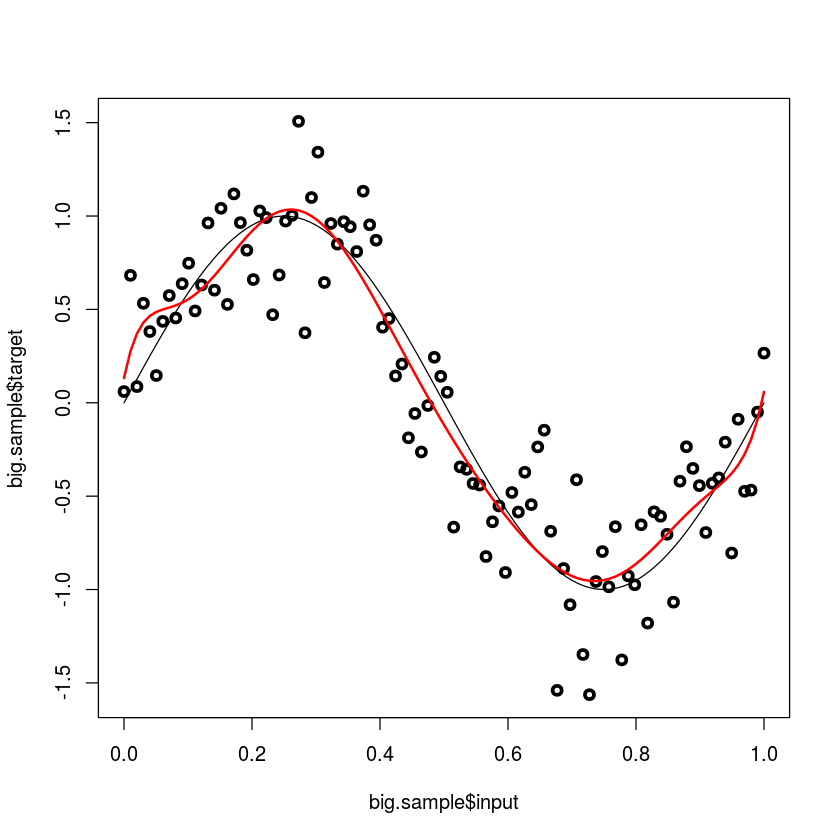

In [36]:
par(mfrow=c(1, 1))
plot(big.sample$input,big.sample$target, lwd=3)
curve (sin(2*pi*x), a, b, add=TRUE)
points(big.sample$input, predict(model), type="l", col="red", lwd=2)

 Sí: estem modelant el TR amb M=9 i no sobreajusta tant (compareu-lo amb la gràfica que hem generat abans)

 Conclusió: a mesura que N es fa gran el problema del sobreajust s'alleuja força. En
general, però, el concepte "N gran" depèn de quantes variables x usem per modelar i, a més, no és usual tenir control sobre N; per tant, en la pràctica caldrà restringir la mida dels coeficients.

<div class="alert alert-block alert-info">
 Ara passem a regressió ridge per re-ajustar el TR més gran (N=100)
</div>

In [37]:
library(MASS)

par(mfcol=c(1,1))

 Aquesta és la idea de la regularització; partim d'una especificació de model sobradament complexe (M=12) i limitem explícitament la mida (en valor absolut) dels coeficients, via el paràmetre lambda (constant de regularització)

 La gràcia ara és estimar un bon valor per lambda: veurem més endavant que es pot fer de manera molt eficient quan el model és lineal. Provem doncs dins una seqüència de valors molt llarga:

In [97]:
lambdes <- seq(0.001,0.5,0.001)

length(lambdes)

[1] 500

 aquest seria el model "estàndar" (sense regularitzar)

In [98]:
model <- glm (target ~ poly(input, 12, raw=TRUE), data = sample, family = gaussian)

aquest seria el model regularitzat

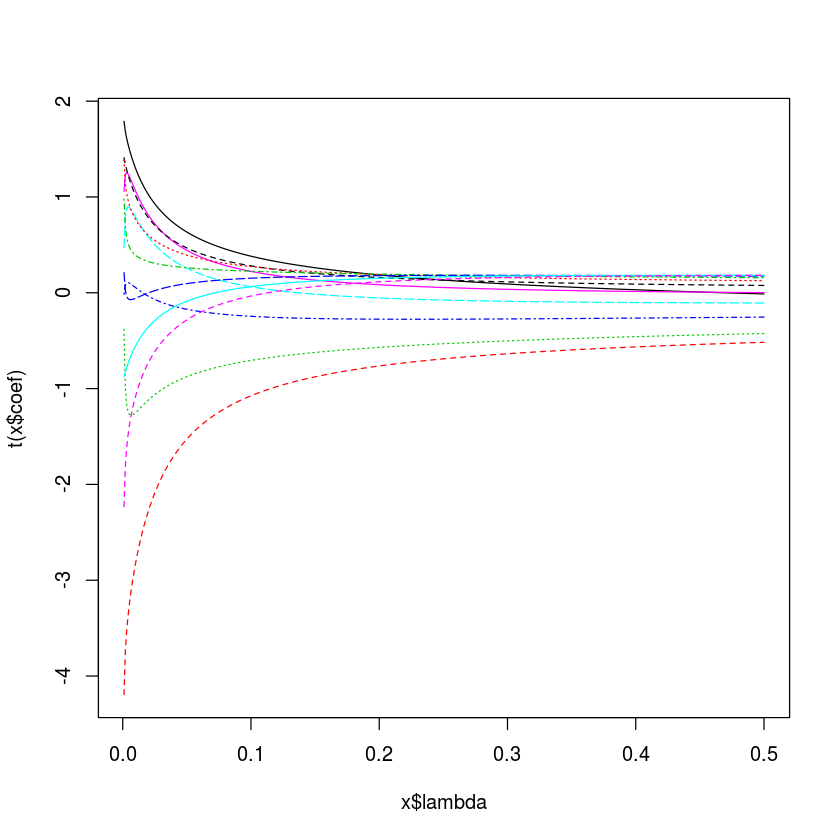

In [99]:
model.ridge <- lm.ridge (model, lambda = lambdes)
plot(model.ridge, lty=1:3)

 El que veiem a la gràfica (que és molt xula) és com tots els coeficients (dels graus 1 al 12) se'n van a zero a mesura que regularitzem més (lambdes més altes)

 Igual que la crida anterior, però ara seleccionem la millor lambda (que és la que té un error quadràtic regularitzat menor); podríem haver fet només aquesta crida directament:

In [100]:
select( lm.ridge(model, lambda = lambdes) )

modified HKB estimator is 1.362679e-13 
modified L-W estimator is 2.12222 
smallest value of GCV  at 0.008 


 hi ha varis criteris per seleccionar la millor lambda de manera eficient; a classe (quan toqui) veurem el GCV

 dóna lambda = 0.008, per tant ajustem un nou model (que serà el definitiu) amb aquest valor:

In [101]:
model.final <- lm.ridge (model,lambda=0.008)

 Compareu els dos grups de coeficients del nostre model M=12 (estàndar i regularitzats)

In [102]:
coef(model)         # M=12 (estàndar)

(Intercept)  poly(input, 12, raw = TRUE)1 
                -5.917363e-01                  1.047188e+02 
 poly(input, 12, raw = TRUE)2  poly(input, 12, raw = TRUE)3 
                -2.262492e+03                  2.444046e+04 
 poly(input, 12, raw = TRUE)4  poly(input, 12, raw = TRUE)5 
                -1.536047e+05                  5.820432e+05 
 poly(input, 12, raw = TRUE)6  poly(input, 12, raw = TRUE)7 
                -1.256837e+06                  1.081480e+06 
 poly(input, 12, raw = TRUE)8  poly(input, 12, raw = TRUE)9 
                 1.407727e+06                 -4.952183e+06 
poly(input, 12, raw = TRUE)10 poly(input, 12, raw = TRUE)11 
                 5.752027e+06                 -3.189032e+06 
poly(input, 12, raw = TRUE)12 
                 7.060999e+05

In [103]:
coef(model.final)   # M=12 (regularitzat)

poly(input, 12, raw = TRUE)1 
                    0.5668855                     4.2975060 
 poly(input, 12, raw = TRUE)2  poly(input, 12, raw = TRUE)3 
                   -8.7660780                    -3.7769895 
 poly(input, 12, raw = TRUE)4  poly(input, 12, raw = TRUE)5 
                    0.2286982                     2.5874052 
 poly(input, 12, raw = TRUE)6  poly(input, 12, raw = TRUE)7 
                    3.5399775                     3.4547777 
 poly(input, 12, raw = TRUE)8  poly(input, 12, raw = TRUE)9 
                    2.6586655                     1.3825659 
poly(input, 12, raw = TRUE)10 poly(input, 12, raw = TRUE)11 
                   -0.2266813                    -2.0787399 
poly(input, 12, raw = TRUE)12 
                   -4.1172210

In [104]:
sqrt(sum(coef(model)^2)) / sqrt(sum(coef(model.final)^2))

[1] 654242

 per tenir una idea millor, calcularem el quocient entre uns i altres. Com sabreu de classe, el coeficient de grau 0 (Intercept) no es regularitza; per això model.final$coef no ens el dóna, però coef() sí. En general és millor usar els mètodes que permeten accedir als camps d'un objecte que accedir-hi 'directament' via \\$

 Millor fem un plot logarítmic, per veure els ordres de magnitud

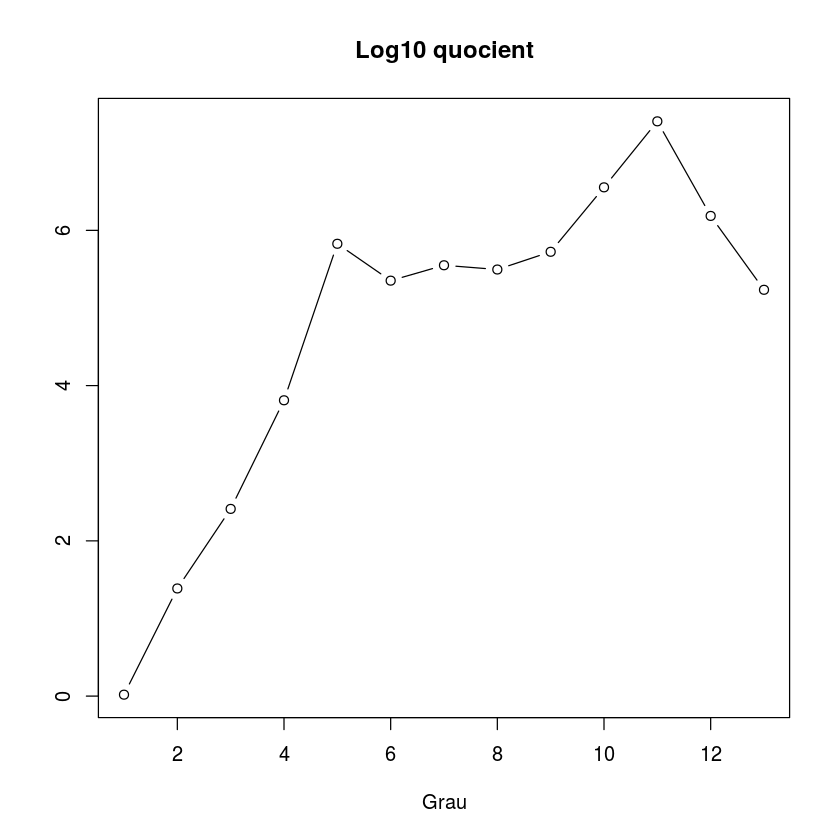

In [106]:
plot (log10(abs(coef(model) / coef(model.final))), xlim=c(1,13), xlab="Grau", ylab="", main="Log10 quocient", type="b")

 Queda per veure que el model regularitzat no és pitjor que l'inicial (no sigui que per penalitzar-li els coeficients ara sigui un model pitjor)

 primer calculem l'error pel mètode estàndar (sense regularitzar) com fins ara

In [107]:
prediccions.classic <- predict (model, newdata=valid.sample)

In [108]:
(NMSE.VA.classic <- sum((valid.sample$target - prediccions.classic)^2)/((N.valid-1)*var(valid.sample$target)))

[1] 4.265301

 dóna terrible, com ja imaginavem

 Malauradament la funció predict() no accepta un objecte lm.ridge() --això és "culpa" dels programadors de lm.ridge(), que no van fer-ho--, no de predict(); total, que ho hem de fer nosaltres:

 primer posem els coeficients en format "xulo", amb els noms de classe

In [109]:
(c <- setNames(coef(model.final), paste0("c_", 0:12)))

c_0        c_1        c_2        c_3        c_4        c_5        c_6 
 0.5668855  4.2975060 -8.7660780 -3.7769895  0.2286982  2.5874052  3.5399775 
       c_7        c_8        c_9       c_10       c_11       c_12 
 3.4547777  2.6586655  1.3825659 -0.2266813 -2.0787399 -4.1172210

 ara calculem les potències (els graus) per les dades x

In [110]:
pots <- outer (X=valid.sample$input, Y=0:12, FUN="^")

 ara calculem el propi polinomi, multiplicant coeficients per potències i sumant-ho tot (és a dir, calculem el producte escalar entre coeficients i potències)

In [111]:
prediccions.regul <- pots %*% c

 finalment ja podem calcular l'error d'aquestes prediccions

In [112]:
(NMSE.VA.regul <- sum((valid.sample$target - prediccions.regul)^2)/((N.valid-1)*var(valid.sample$target)))

[1] 0.2368707

 dóna 0.2368707, mentre que el model anterior, trobat per prova i error de M donava 0.2335588; és a dir, són dos models igualment bons, però el regularitzat s'ha trobat mitjançant un mecanisme de control de complexitat que és independent del métode (només afecta la funció d'error) i el paràmetre lambda és més fàcil d'ajustar i menys sensible a fluctuacions